<a href="https://colab.research.google.com/github/navas604/Ciencia-de-Datos-en-Python/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Universidad Galileo**
## **Maestría en Data Science**
## **Ciencia de Datos en Python**
## **Antonio Everardo Navas Contreras, 14003163**
## **07/04/2021**

---

## **PROYECTO**

---

### CARGAR LIBRERIAS

In [402]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

### CARGAR Y PREPARAR EL DATASET, SEPARAR EN TRAIN Y TEST

In [3]:
# Cargar el Dataset original

URL = "proyecto_training_data.npy"
dataset = np.load(URL) 

In [4]:
dataset

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [5]:
# Explorando el Dataset

print("Dataset Shape:       ", dataset.shape)
print("Dataset type:        ", type(dataset))
print("Dataset nan values:  ", np.isnan(dataset).sum())

Dataset Shape:        (1460, 6)
Dataset type:         <class 'numpy.ndarray'>
Dataset nan values:   259


In [6]:
# Limpiar el dataset de valores "nan"

dataset = dataset[~np.isnan(dataset).any(axis=1)]

print("Dataset Shape:       ", dataset.shape)
print("Dataset type:        ", type(dataset))
print("Dataset nan values:  ", np.isnan(dataset).sum())

Dataset Shape:        (1201, 6)
Dataset type:         <class 'numpy.ndarray'>
Dataset nan values:   0


In [7]:
# Convertirlo a DataFrame

variables = list(["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])

df = pd.DataFrame(dataset, columns=variables)

df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1196,175000.0,6.0,953.0,7.0,1999.0,62.0
1197,210000.0,6.0,2073.0,7.0,1978.0,85.0
1198,266500.0,7.0,1188.0,9.0,1941.0,66.0
1199,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [8]:
# Revisar el tipo de las variables

print(df.dtypes)

SalePrice       float64
OverallQual     float64
1stFlrSF        float64
TotRmsAbvGrd    float64
YearBuilt       float64
LotFrontage     float64
dtype: object


In [9]:
# Convertir algunas variables a enteros
df["OverallQual"] = df["OverallQual"].astype(int)
df["TotRmsAbvGrd"] = df["TotRmsAbvGrd"].astype(int)
df["YearBuilt"] = df["YearBuilt"].astype(int)

print(df.dtypes)

SalePrice       float64
OverallQual       int64
1stFlrSF        float64
TotRmsAbvGrd      int64
YearBuilt         int64
LotFrontage     float64
dtype: object


In [10]:
df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7,856.0,8,2003,65.0
1,181500.0,6,1262.0,6,1976,80.0
2,223500.0,7,920.0,6,2001,68.0
3,140000.0,7,961.0,7,1915,60.0
4,250000.0,8,1145.0,9,2000,84.0
...,...,...,...,...,...,...
1196,175000.0,6,953.0,7,1999,62.0
1197,210000.0,6,2073.0,7,1978,85.0
1198,266500.0,7,1188.0,9,1941,66.0
1199,142125.0,5,1078.0,5,1950,68.0


In [11]:
# Separar dataframe en Train y Test

rows, columns = df.shape

train = df.loc[:int(rows*0.8),]
test = df.loc[int(rows*0.8)+1:,]

print("Train shape: ", train.shape)
print("Test shape:  ", test.shape)

Train shape:  (961, 6)
Test shape:   (240, 6)


In [12]:
print(train)
print(test)

     SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0     208500.0            7     856.0             8       2003         65.0
1     181500.0            6    1262.0             6       1976         80.0
2     223500.0            7     920.0             6       2001         68.0
3     140000.0            7     961.0             7       1915         60.0
4     250000.0            8    1145.0             9       2000         84.0
..         ...          ...       ...           ...        ...          ...
956   146000.0            6     855.0             7       1978         24.0
957   129000.0            5     894.0             5       1968        109.0
958   108959.0            4    1258.0             6       1969         60.0
959   233170.0            7    1502.0             7       2009         79.0
960   245350.0            8    1694.0             7       2008         64.0

[961 rows x 6 columns]
      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt 

### ANALISIS EXPLORATORIO

In [13]:
# Estadística descriptiva utilizando la función .describe() de la librería pandas

round(train.describe(), 2)

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,961.00,961.00,961.00,961.00,961.00,961.00
mean,181002.57,6.12,1155.83,6.50,1970.64,69.96
std,83374.26,1.42,372.73,1.62,31.55,23.49
min,34900.00,1.00,334.00,2.00,1875.00,21.00
25%,127500.00,5.00,877.00,5.00,1950.00,59.00
50%,159500.00,6.00,1086.00,6.00,1972.00,70.00
75%,214000.00,7.00,1391.00,7.00,2003.00,80.00
max,755000.00,10.00,3138.00,14.00,2010.00,313.00


In [14]:
# Media utilizando la librería numpy

print(" VARIABLE         MEDIA \n\n", round(np.mean(train, axis=0), 2))

 VARIABLE         MEDIA 

 SalePrice       181002.57
OverallQual          6.12
1stFlrSF          1155.83
TotRmsAbvGrd         6.50
YearBuilt         1970.64
LotFrontage         69.96
dtype: float64


In [15]:
# Valor Máximo utilizando la librería numpy

print(" VARIABLE      VALOR MAXIMO \n\n", np.max(train, axis=0))

 VARIABLE      VALOR MAXIMO 

 SalePrice       755000.0
OverallQual         10.0
1stFlrSF          3138.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64


In [16]:
# Valor Mínimo utilizando la librería numpy

print(" VARIABLE      VALOR MINIMO \n\n", np.min(train, axis=0))

 VARIABLE      VALOR MINIMO 

 SalePrice       34900.0
OverallQual         1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1875.0
LotFrontage        21.0
dtype: float64


In [17]:
# Desviación Estándar utilizando la librería numpy

print(" VARIABLE    DESVIACION ESTANDAR \n\n", round(np.std(train, axis=0), 2))

 VARIABLE    DESVIACION ESTANDAR 

 SalePrice       83330.87
OverallQual         1.42
1stFlrSF          372.53
TotRmsAbvGrd        1.62
YearBuilt          31.53
LotFrontage        23.47
dtype: float64


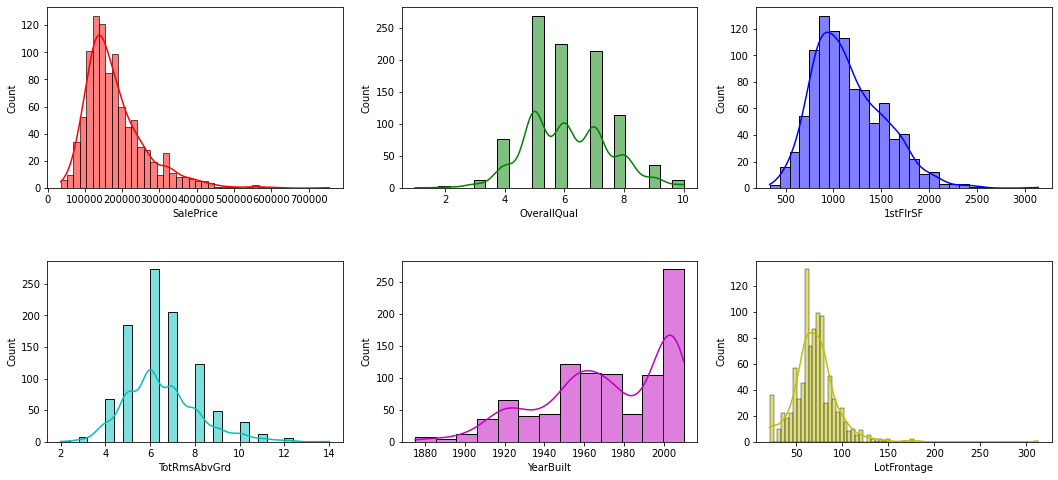

In [18]:
# Histograma de cada variable

plt.figure(figsize=(18, 8))
plt.subplots_adjust(hspace=0.4)

colors = ["r", "g", "b", "c", "m", "y"]

for i in range(columns):
  plt.subplot(2, 3, i+1)
  sns.histplot(train.iloc[:,i], kde=True, color=colors[i])

plt.show()  

In [19]:
# Matriz de Correlación entre todas las variables

corr_matrix = round(train.corr(), 2)
corr_matrix

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.00,0.81,0.64,0.57,0.55,0.36
OverallQual,0.81,1.00,0.52,0.46,0.58,0.24
1stFlrSF,0.64,0.52,1.00,0.43,0.35,0.42
TotRmsAbvGrd,0.57,0.46,0.43,1.00,0.14,0.34
YearBuilt,0.55,0.58,0.35,0.14,1.00,0.12
LotFrontage,0.36,0.24,0.42,0.34,0.12,1.00


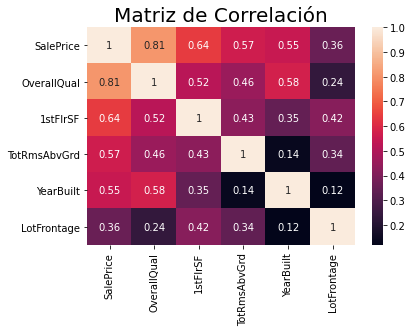

In [20]:
# Visualización de Matriz de Correlación entre todas las variables

sns.heatmap(corr_matrix, annot=True)
plt.title("Matriz de Correlación", fontdict={"fontsize":20, "color":"black"})
plt.show()

In [21]:
# Coeficientes de correlación con el precio de venta "SalePrice"

corr_matrix["SalePrice"]

SalePrice       1.00
OverallQual     0.81
1stFlrSF        0.64
TotRmsAbvGrd    0.57
YearBuilt       0.55
LotFrontage     0.36
Name: SalePrice, dtype: float64

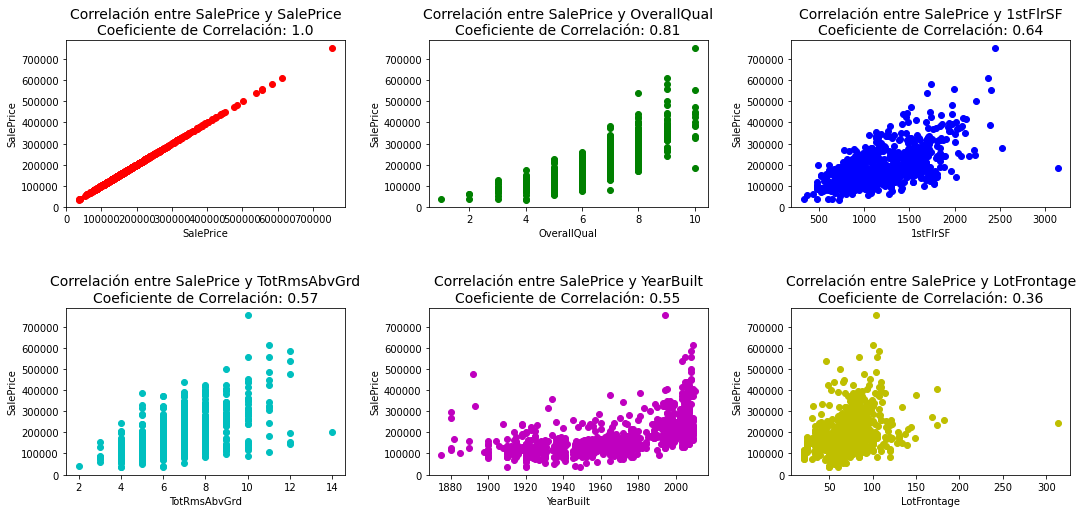

In [22]:
# Gráfica de dispersión de cada variable x con y ("SalePrice")

plt.figure(figsize=(18, 8))
plt.subplots_adjust(hspace=0.6, wspace=0.3)

colors = ["r", "g", "b", "c", "m", "y"]

for i in range(columns):
  plt.subplot(2, 3, i+1)
  plt.scatter(train.iloc[:,i], train.iloc[:,0], color=colors[i])
  plt.title("Correlación entre SalePrice y {}\nCoeficiente de Correlación: {}".format(train.columns[i], corr_matrix.iloc[0,i]), 
            fontdict={"fontsize":14, "color":"black"})
  plt.xlabel(train.columns[i])
  plt.ylabel(train.columns[0])

plt.show()


Las 2 variables con mayor potencial predictivo (que presentan mayor correlación) son:

*   **OverallQual** con coeficiente de correlación de **0.81**
*   **1stFlrSF** con coeficiente de correlación de **0.64**


### FUNCIONES

In [610]:
# Función para entrenar el modelo

def train_function(x, y, epochs, imprimir_error_cada, lr):
  
  matrix = np.array(x).reshape(-1,1)
  ones_matrix = np.ones_like(matrix)
  new_matrix = np.hstack((matrix, ones_matrix))

  mb = [0, 0]
  error = []
  modelo_dict = {}
  error_dict = {}

  for i in range(epochs):
    yhat = np.matmul(new_matrix, mb)

    error.append(round(0.5 * np.mean(np.power(y - yhat, 2)), 2))

    gradientes_m_b = np.array((np.mean((yhat - y)*x), np.mean(yhat - y)))
    
    mb = mb - (lr * gradientes_m_b)

    modelo_dict[i] = list(mb)
    error_dict[i] = error[i]

    if i % imprimir_error_cada == 0:
      print("Iteración:", i, "  Error:", error[i])

  return("----------------------------------------------------------------------------------------------------------------------",
         "Modelo (mb): ", modelo_dict,
         "----------------------------------------------------------------------------------------------------------------------",
         "Error: ", error_dict)


In [611]:
# Función para graficar como cambia el Error por cada Iteración

def error_por_iteracion_graph(errores):

  plt.plot(list(errores.keys()), list(errores.values()), color="green", linewidth=2)

  plt.title("Error por cada Iteración", fontdict={"fontsize":20, "color":"black"})
  plt.xlabel("Iteración")
  plt.ylabel("Error")

  return plt.show()


In [612]:
# Función para graficar como evoluciona el modelo entrenado en el tiempo

def evolucion_modelo_graph(modelos, n, x, y):

  mb_list = list(modelos.values())
  
  matrix = np.array(x).reshape(-1,1)
  ones_matrix = np.ones_like(matrix)
  new_matrix = np.hstack((matrix, ones_matrix))

  for i in range(0, len(mb_list), n):
    mb = mb_list[i]
    yhat = np.matmul(new_matrix, mb)
    plt.plot(x, yhat, "orange", linewidth=2)
    
  plt.plot(x, y, "b.", ms=10)

  plt.title("Evolución del modelo entrenado", fontdict={"fontsize":20, "color":"black"})
  plt.xlabel("Variable x")
  plt.ylabel("Precio de casa")

  return plt.show()

### ENTRENAR MODELOS CON LA FUNCION CREADA

#### Modelo con datos de prueba brindados en el Excel

In [613]:
# Datos de prueba brindados en el excel

x = [65, 80, 68]
y = [208.5, 181.5, 223.5]

epochs = 3
imprimir_error_cada = 1
lr = 0.001

In [614]:
# Entrenar el modelo. Datos de prueba brindados en el excel

train_excel = train_function(x, y, epochs, imprimir_error_cada, lr)
modelos_excel = train_excel[2]
errores_excel = train_excel[5]

train_excel

Iteración: 0   Error: 21061.12
Iteración: 1   Error: 341918.33
Iteración: 2   Error: 5693492.05


('----------------------------------------------------------------------------------------------------------------------',
 'Modelo (mb): ',
 {0: [14.4235, 0.20450000000000002],
  1: [-44.48217000000001, -0.6152730000000002],
  2: [196.08788449300005, 2.748076343]},
 '----------------------------------------------------------------------------------------------------------------------',
 'Error: ',
 {0: 21061.12, 1: 341918.33, 2: 5693492.05})

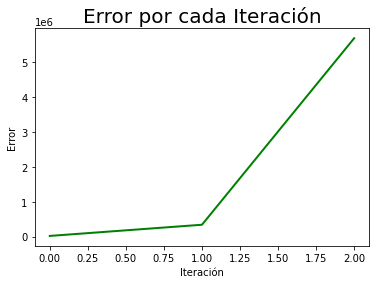

In [615]:
# Graficar error por cada interación. Datos de prueba brindados en el excel

error_por_iteracion_graph(errores_excel)

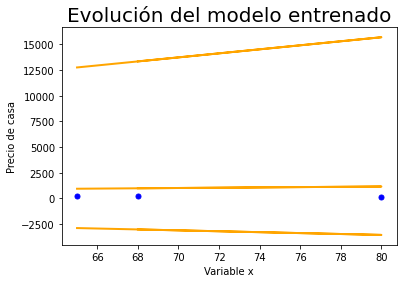

In [616]:
# Graficar Evolución del modelo entrenado. Datos de prueba brindados en el excel

n = 1

evolucion_modelo_graph(modelos_excel, n, x, y)

#### Modelo con variable **OverallQual**

In [617]:
# Separar el vector de la variable OverallQual

SalePrice = train["SalePrice"]
OverallQual = train["OverallQual"]

epochs = 300
imprimir_error_cada = 50
lr = 0.049

In [618]:
# Entrenar el modelo con la variable OverallQual

train_OverallQual = train_function(OverallQual, SalePrice, epochs, imprimir_error_cada, lr)
modelos_OverallQual = train_OverallQual[2]
errores_OverallQual = train_OverallQual[5]

train_OverallQual

Iteración: 0   Error: 19852981010.0
Iteración: 50   Error: 4868304610.66
Iteración: 100   Error: 2039741814.85
Iteración: 150   Error: 1480090910.9
Iteración: 200   Error: 1349512186.86
Iteración: 250   Error: 1304433374.18


('----------------------------------------------------------------------------------------------------------------------',
 'Modelo (mb): ',
 {0: [59005.223013527575, 8869.125686784599],
  1: [1070.3365867081811, -404.90226814625566],
  2: [58124.10476381347, 8162.835683555975],
  3: [2107.6942051005753, -812.1440623893759],
  4: [57274.58167229072, 7464.218393681396],
  5: [3113.1523595229446, -1221.5714017110477],
  6: [56455.596301532765, 6773.096273747563],
  7: [4087.7548877446316, -1633.0357732293278],
  8: [55666.12626584224, 6089.297284347842],
  9: [5032.511140999319, -2046.393949428778],
  10: [54905.18307099367, 5412.65470974346],
  11: [5948.397124981217, -2461.50781144767],
  12: [54171.81099237102, 4743.006983483609],
  13: [6836.356603076929, -2878.2441782218893],
  14: [53465.08599024153, 4080.1975197889924],
  15: [7697.3021630970325, -3296.474641292052],
  16: [52784.114660914485, 3424.0745505043596],
  17: [8532.116248701095, -3716.075405085321],
  18: [52128.0332226

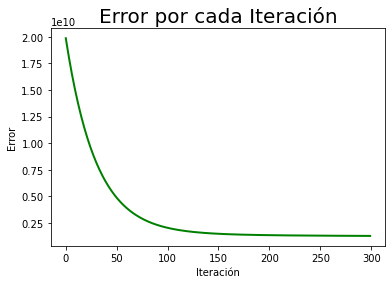

In [619]:
# Graficar error por cada interación. Variable OverallQual

error_por_iteracion_graph(errores_OverallQual)

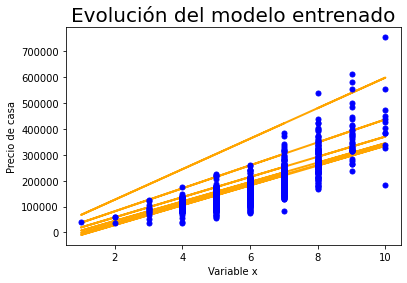

In [620]:
# Graficar Evolución del modelo entrenado. Variable OverallQual

n = 50    # Graficar cada n iteraciones

evolucion_modelo_graph(modelos_OverallQual, n, OverallQual, SalePrice)

#### Modelo con variable **1stFlrSF**

In [621]:
# Separar el vector de la variable 1stFlrSF

SalePrice = train["SalePrice"]
FirstFlrSF = train["1stFlrSF"]

epochs = 10
imprimir_error_cada = 1
lr = 0.000001

In [622]:
# Entrenar el modelo con la variable 1stFlrSF

train_FirstFlrSF = train_function(FirstFlrSF, SalePrice, epochs, imprimir_error_cada, lr)
modelos_FirstFlrSF = train_FirstFlrSF[2]
errores_FirstFlrSF = train_FirstFlrSF[5]

train_FirstFlrSF

Iteración: 0   Error: 19852981010.0
Iteración: 1   Error: 6070309066.2
Iteración: 2   Error: 2964076967.28
Iteración: 3   Error: 2264018378.54
Iteración: 4   Error: 2106244581.86
Iteración: 5   Error: 2070686741.12
Iteración: 6   Error: 2062672988.1
Iteración: 7   Error: 2060866908.72
Iteración: 8   Error: 2060459866.86
Iteración: 9   Error: 2060368129.27


('----------------------------------------------------------------------------------------------------------------------',
 'Modelo (mb): ',
 {0: [229.08248416337148, 0.18100256503642037],
  1: [120.32926214562579, 0.09722373806156634],
  2: [171.95810130965103, 0.13914561284217092],
  3: [147.44813963560495, 0.12139310347980184],
  4: [159.08384756041323, 0.13197004682230087],
  5: [153.55998091393096, 0.1290980384934462],
  6: [156.18234596644652, 0.13261070319349896],
  7: [154.9374187024742, 0.13309234698622316],
  8: [155.52842618892248, 0.13501291894248657],
  9: [155.24785321753194, 0.13625038272259282]},
 '----------------------------------------------------------------------------------------------------------------------',
 'Error: ',
 {0: 19852981010.0,
  1: 6070309066.2,
  2: 2964076967.28,
  3: 2264018378.54,
  4: 2106244581.86,
  5: 2070686741.12,
  6: 2062672988.1,
  7: 2060866908.72,
  8: 2060459866.86,
  9: 2060368129.27})

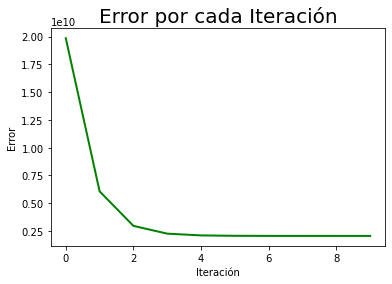

In [623]:
# Graficar error por cada interación. Variable 1stFlrSF

error_por_iteracion_graph(errores_FirstFlrSF)

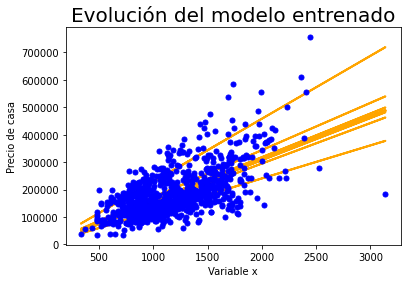

In [624]:
# Graficar Evolución del modelo entrenado. Variable 1stFlrSF

n = 1    # Graficar cada n iteraciones

evolucion_modelo_graph(modelos_FirstFlrSF, n, FirstFlrSF, SalePrice)

### ENTRENAR MODELOS CON LA FUNCION **SCIKIT-LEARN**

In [625]:
# Entrenar modelo de regresión lineal para las 2 variables seleccionadas con mayor correlación, usando SCIKIT-LEARN

SalePrice = np.array(train["SalePrice"]).reshape(-1,1)
OverallQual = np.array(train["OverallQual"]).reshape(-1,1)
FirstFlrSF = np.array(train["1stFlrSF"]).reshape(-1,1)

LR_OverallQual = LinearRegression()
LR_OverallQual.fit(OverallQual, SalePrice)

LR_FirstFlrSF = LinearRegression()
LR_FirstFlrSF.fit(FirstFlrSF, SalePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [629]:
# Último modelo(con menor error) para cada variable x elegida

mb_OverallQual = modelos_OverallQual[len(modelos_OverallQual)-1]
mb_FirstFlrSF = modelos_FirstFlrSF[len(modelos_FirstFlrSF)-1]

print("Modelo (mb) para OverallQual: ", mb_OverallQual)
print("Modelo (mb) para FirstFlrSF:  ", mb_FirstFlrSF)

Modelo (mb) para OverallQual:  [38764.01728843078, -54879.84638859897]
Modelo (mb) para FirstFlrSF:   [155.24785321753194, 0.13625038272259282]


In [631]:
def prediccion_promedio(mb_model, LR_model, x):
  matrix = np.array(x).reshape(-1,1)
  ones_matrix = np.ones_like(matrix)
  new_matrix = np.hstack((matrix, ones_matrix))

  yhat_manual = np.matmul(new_matrix, mb_model).reshape(-1,1)
  yhat_scikit_learn = LR_model.predict(x)
  yhat_promedio = (yhat_manual + yhat_scikit_learn) / 2

  return("----------------------------------------------------------------------------------------------------------------------",
         "Predicción de SalePrice con el modelo entrenado manualmente: ", yhat_manual,
         "----------------------------------------------------------------------------------------------------------------------",
         "Predicción de SalePrice con  el modelo entrenado con SCIKIT-LEARN: ", yhat_scikit_learn,
         "----------------------------------------------------------------------------------------------------------------------",
         "Predicción de SalePrice promedio de las 2 anteriores: ", yhat_promedio)

In [632]:
prediccion_promedio(mb_OverallQual, LR_OverallQual, OverallQual[:5,])

('----------------------------------------------------------------------------------------------------------------------',
 'Predicción de SalePrice con el modelo entrenado manualmente: ',
 array([[216468.27463042],
        [177704.25734199],
        [216468.27463042],
        [216468.27463042],
        [255232.29191885]]),
 '----------------------------------------------------------------------------------------------------------------------',
 'Predicción de SalePrice con  el modelo entrenado con SCIKIT-LEARN: ',
 array([[222582.80833084],
        [175069.59334162],
        [222582.80833084],
        [222582.80833084],
        [270096.02332006]]),
 '----------------------------------------------------------------------------------------------------------------------',
 'Predicción de SalePrice promedio de las 2 anteriores: ',
 array([[219525.54148063],
        [176386.9253418 ],
        [219525.54148063],
        [219525.54148063],
        [262664.15761945]]))